<img src="img/Auswahl_2016-05-02_001.png"></img>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Holger Prang </td>
    <td>WM</td>
  </tr>
  <tr>
    <td>Eugene Reese</td>
    <td>319776</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

In [2]:
%matplotlib inline  
import matplotlib
from matplotlib.mlab import PCA
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

<img src="img/Auswahl_2016-05-02_002.png"></img>

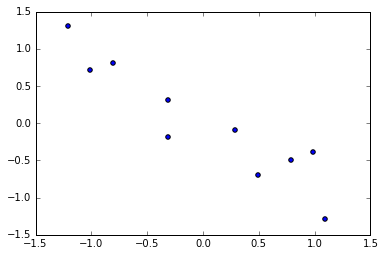

In [104]:
pcadata2d = np.genfromtxt('pca-data-2d.dat', delimiter='   ',skip_header=0)
pcadata2dCentered = pcadata2d - np.mean(pcadata2d,axis=0)
plt.scatter(pcadata2dCentered[:,0],pcadata2dCentered[:,1] )

<img src="img/Auswahl_2016-05-02_003.png"></img>

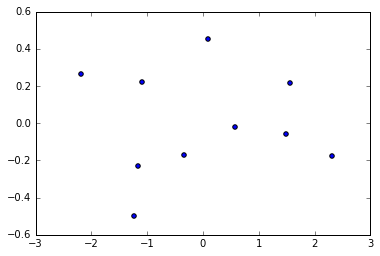

In [103]:
pcadata2dPCA = PCA(pcadata2dCentered)
plt.scatter(pcadata2dPCA.Y[:,0],pcadata2dPCA.Y[:,1] )

<img src="img/Auswahl_2016-05-02_004.png"></img>

In [105]:
#TODO

<img src="img/Auswahl_2016-05-02_005.png"></img>

mean before centering
[ 0.04355465  0.09190794 -0.0594604 ]
mean after centering
[  3.75255382e-17  -4.66293670e-17  -5.99520433e-17]


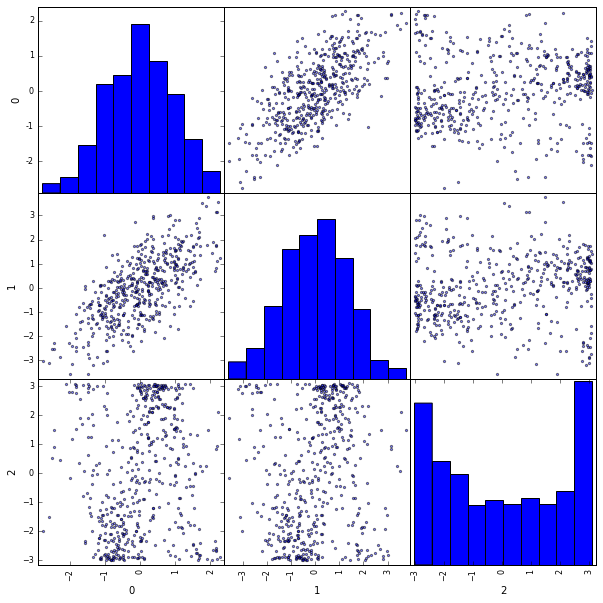

In [36]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from scipy import stats, integrate

pcadata3d = np.genfromtxt('pca-data-3d.txt',delimiter=',',skip_header=1)[:,:]
print 'mean before centering'  
print np.mean(pcadata3d,axis=0)
pcadata3dCentered = pcadata3d - np.mean(pcadata3d,axis=0)
print 'mean after centering'  
print np.mean(pcadata3dCentered,axis=0)
# print(pcadata3dPCA)
df = pd.DataFrame(pcadata3dCentered[:,:3])
# make a scatter plot
scatter_matrix(df, figsize=(10, 10))
pass

<img src="img/Auswahl_2016-05-02_006.png"></img>

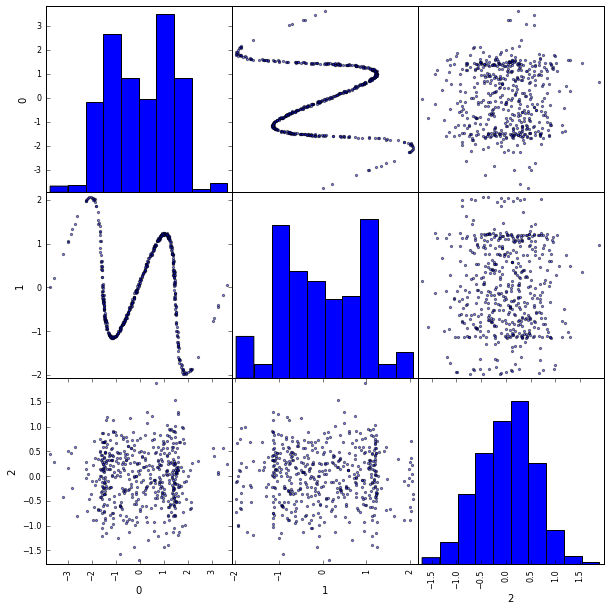

In [40]:
pcadata3dPCA = PCA(pcadata3dCentered)
# plt.scatter(pcadata3dPCA.Y[:,0],pcadata3dPCA.Y[:,1] )
# print(pcadata3dPCA)
df = pd.DataFrame(pcadata3dPCA.Y[:,:])
# make a scatter plot
scatter_matrix(df, figsize=(10, 10))
pass

<img src="img/Auswahl_2016-05-02_007.png"></img>

(i)


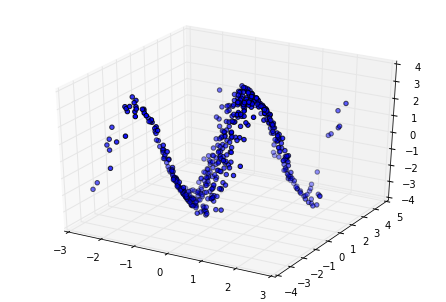

In [44]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
#fig2 = pylab.figure()
#fig3 = pylab.figure()
ax = Axes3D(fig)
#ax2 = Axes3D(fig2)
#ax3 = Axes3D(fig3)

print "(i)"
sequence_containing_x_vals = pcadata3d[:,0]
sequence_containing_y_vals = pcadata3d[:,1]
sequence_containing_z_vals = pcadata3d[:,2]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

#print "(ii)"
#sequence_containing_x_vals = pcadata3dCentered[:,0]
#sequence_containing_y_vals = pcadata3dCentered[:,1]
#sequence_containing_z_vals = pcadata3dCentered[:,2]

#ax2.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
#pyplot.show()

#print "(iii)"
#sequence_containing_x_vals = pcadata3dPCA[:,0]
#sequence_containing_y_vals = pcadata3dPCA[:,1]
#sequence_containing_z_vals = pcadata3dPCA[:,2]

#ax3.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
#pyplot.show()

<img src="img/Auswahl_2016-05-02_008.png"></img>

<img src="img/Auswahl_2016-05-02_009.png"></img>

<img src="img/Auswahl_2016-05-02_010.png"></img>

<img src="img/Auswahl_2016-05-02_011.png"></img>

<img src="img/Auswahl_2016-05-02_012.png"></img>

<img src="img/Auswahl_2016-05-02_013.png"></img>

In [5]:
from scipy import misc

imgListString = os.listdir('imgpca\\')
imgListB = list()
imgListN = list()
for name in imgListString:
    if(name.startswith('b')):
        imgListB.append(misc.imread('imgpca\\'+name))
    if(name.startswith('n')):
        imgListN.append(misc.imread('imgpca\\'+name))
    
#create sample matrix for buildings
sampleMatrixB = np.empty((len(imgListB)* 500,256))
counter = 0
for img in imgListB:
    for x in xrange(0, 500):
        sampleMatrixB[counter, : ] = getSampleFromImg(img).ravel()
        counter+=1

#create sample matrix for nature
sampleMatrixN = np.empty((len(imgListN)* 500,256))
counter = 0
for img in imgListN:
    for x in xrange(0, 500):
        sampleMatrixN[counter, : ] = getSampleFromImg(img).ravel()
        counter+=1

In [4]:
def getSampleFromImg(image):
    randStartPoint = getRandPointIn2DArray(image.shape)
    sample = image[randStartPoint[0]:randStartPoint[0]+16,randStartPoint[1]:randStartPoint[1]+16]
    return sample

def getRandPointIn2DArray(imageShape):
    rndX = np.random.randint(0,imageShape[0]-16)
    rndY = np.random.randint(0,imageShape[1]-16)
    return np.array([rndX,rndY])

<img src="img/Auswahl_2016-05-02_014.png"></img>

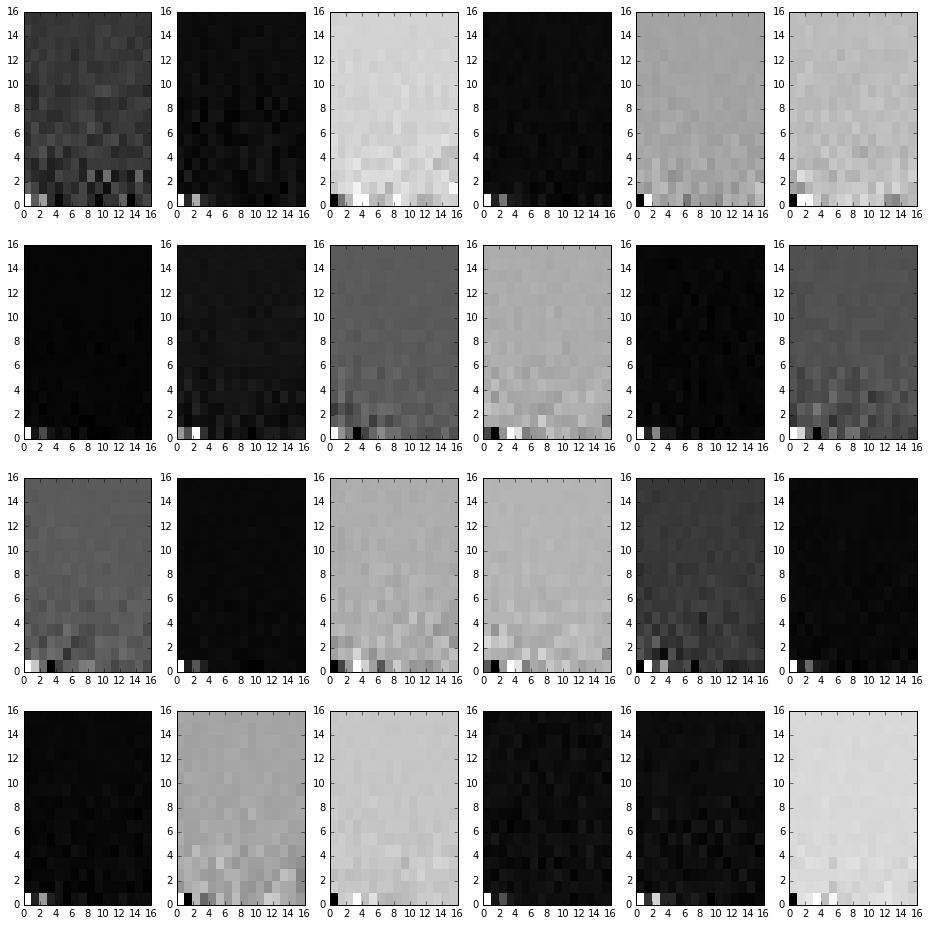

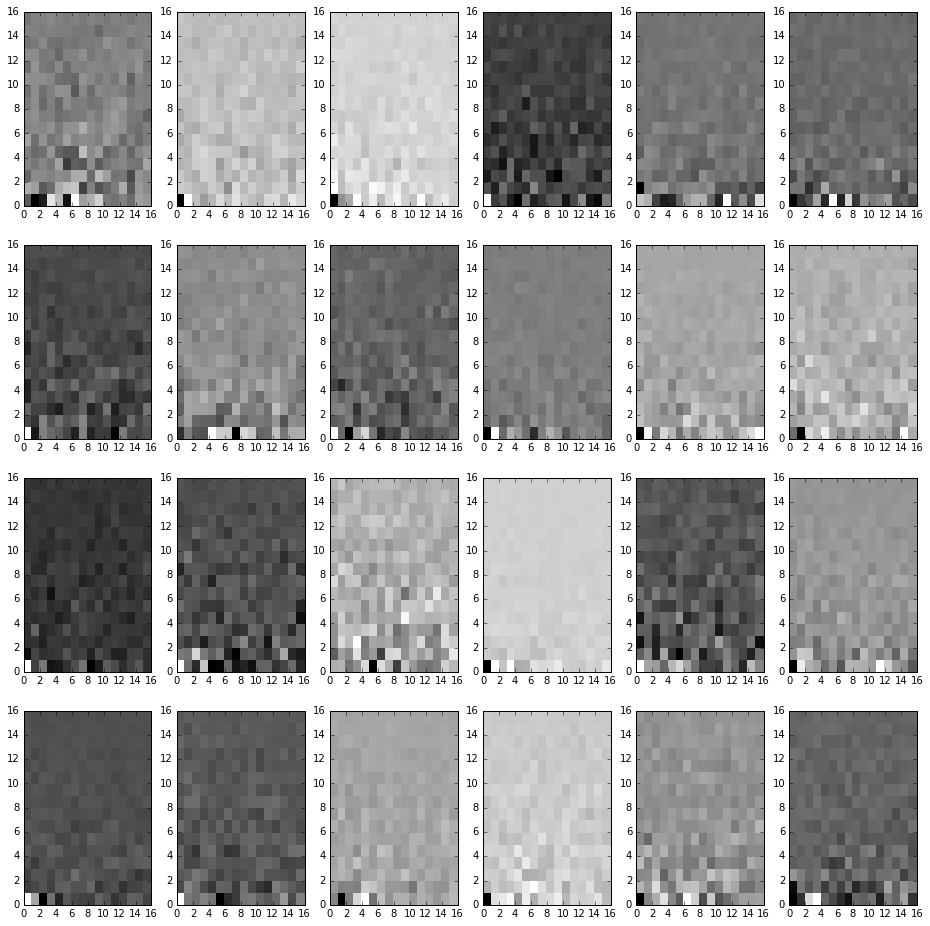

In [24]:
resultsB = PCA(sampleMatrixB)
resultsN = PCA(sampleMatrixN)
#TODO

f, ax = plt.subplots(4,6,figsize=(16, 16))
for x in xrange(0, 24):
    ax[x/6,x%6].pcolor(resultsB.Y[x,:].reshape((16,16)), cmap=plt.get_cmap('gray'))

f, ax = plt.subplots(4,6,figsize=(16, 16))
for x in xrange(0, 24):
    ax[x/6,x%6].pcolor(resultsN.Y[x,:].reshape((16,16)), cmap=plt.get_cmap('gray'))

<img src="img/Auswahl_2016-05-02_015.png"></img>

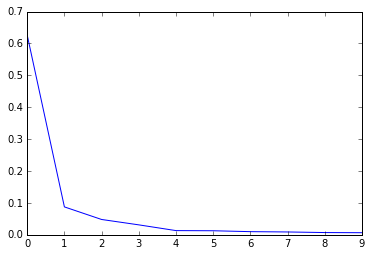

In [80]:
plt.plot(resultsB.fracs[0:10]) 
plt.show()

From the elbow-plot of the fraction each PC contributes to the total variance, the first 4 PCs contribute the main part of the total variance. From the 5th PC on they all contribute almost nothing to the variance. Hence the first four PC should be kept for the building images.

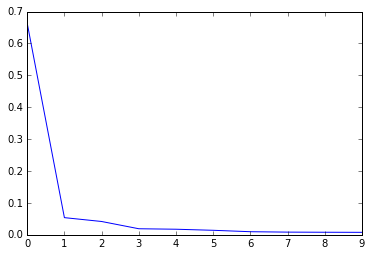

In [81]:
plt.plot(resultsN.fracs[0:10])
plt.show()

From the elbow-plot of the fraction each PC contributes to the total variance, the first 3 PCs contribute the main part of the total variance. From the 4th PC on they all contribute almost nothing to the variance. Hence the first three PC should be kept for the nature images.